In [4]:
# Import required package
import numpy as np
import pandas as pd
import csv, sqlite3

### Data Cleaning

In [5]:
#save the table to Dataframe
df = pd.read_csv("spaceX_uncleaned")
data_falcon9=df.reset_index()
data_falcon9=data_falcon9.drop(['index'],axis=1)
data_falcon9.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [6]:
#Find missing values in our dataset
data_falcon9.isnull().sum()

Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

The **LandingPad** column will retain None values to represent when landing pads were not used. So Ignoring that


Missing value in payloadMass is replaced by Mean value

In [7]:
# Cmean value of PayloadMass
mean=data_falcon9['PayloadMass'].mean()
# Replace the np.nan values with its mean value
data_falcon9['PayloadMass'].replace(np.nan,mean,inplace=True)

In [8]:
data_falcon9.isnull().sum()

Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Need to Create a Class with 0 and 1 to see the Launch Outcome


In [9]:
data_falcon9=data_falcon9.drop('Unnamed: 0',axis=1)

In [10]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [11]:
data_falcon9['LaunchSite'].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [12]:
landing_outcomes=data_falcon9['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [13]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [14]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [15]:
landing_class=[]
for x in data_falcon9['Outcome']:
    if x in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

In [16]:
data_falcon9['Class']=landing_class
data_falcon9['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
#This feature can give us the Success Rate
data_falcon9["Class"].mean()

0.6666666666666666

### Connect to the database

In [18]:
%load_ext sql

In [19]:
#create Connection object for sqllite
con = sqlite3.connect('my_database.db')
cur = con.cursor()

In [20]:
#intiate magic sql 
%sql sqlite:///my_database.db

In [21]:
df=pd.read_csv('Spacex.csv')
df.shape

(999, 10)

In [22]:
#taking first 100 records
df=df.loc[0:100]
df.shape

(101, 10)

In [23]:
#creating table based on the DataFrame
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

#### Exploratory analysis using SQL

In [24]:
%%sql
select * from SPACEXTBL

 * sqlite:///my_database.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
06/04/2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Success,Failure (parachute)
12/08/2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0.0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
22/05/2012,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525.0,LEO (ISS),NASA (COTS),Success,No attempt
10/08/2012,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),Success,No attempt
03/01/2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),Success,No attempt
29/09/2013,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500.0,Polar LEO,MDA,Success,Uncontrolled (ocean)
12/03/2013,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,3170.0,GTO,SES,Success,No attempt
01/06/2014,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,3325.0,GTO,Thaicom,Success,No attempt
18/04/2014,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,2296.0,LEO (ISS),NASA (CRS),Success,Controlled (ocean)
14/07/2014,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,1316.0,LEO,Orbcomm,Success,Controlled (ocean)


#Unique Launch_sites

In [25]:
%%sql 
select distinct Launch_Site from SPACEXTBL

 * sqlite:///my_database.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


The total payload mass carried by boosters launched by NASA (CRS)

In [26]:
%%sql 
select Sum(PAYLOAD_MASS__KG_) from SPACEXTBL
where Payload like '%CRS%'

 * sqlite:///my_database.db
Done.


Sum(PAYLOAD_MASS__KG_)
111268.0


Average payload mass carried by booster version F9 v1.1

In [27]:
%%sql 
select avg(PAYLOAD_MASS__KG_) from SPACEXTBL
where Booster_Version like '%F9 v1.1%'

 * sqlite:///my_database.db
Done.


avg(PAYLOAD_MASS__KG_)
2534.6666666666665


the date when the first succesful landing outcome in ground pad was acheived

In [28]:
%%sql
select Date from SPACEXTBL
where Landing_Outcome like '%Success (ground pad)%'
order by Date desc
limit 1

 * sqlite:///my_database.db
Done.


Date
22/12/2015


The names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000

In [29]:
%%sql
select Booster_Version from SPACEXTBL 
where Landing_Outcome like '%Success (drone ship)%'
and (PAYLOAD_MASS__KG_ between 4000 and 6000)


 * sqlite:///my_database.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


the total number of successful and failure mission outcomes

In [30]:
%%sql
select Mission_Outcome ,count(*)
from SPACEXTBL
group by Mission_Outcome


 * sqlite:///my_database.db
Done.


Mission_Outcome,count(*)
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


 names of the booster_versions which have carried the maximum payload mass

In [31]:
%%sql
select Distinct Booster_Version from  SPACEXTBL 
where PAYLOAD_MASS__KG_ = (select max(PAYLOAD_MASS__KG_) from SPACEXTBL)

 * sqlite:///my_database.db
Done.


Booster_Version
F9 B5 B1048.4
F9 B5 B1049.4
F9 B5 B1051.3
F9 B5 B1056.4
F9 B5 B1048.5
F9 B5 B1051.4
F9 B5 B1049.5
F9 B5 B1060.2
F9 B5 B1058.3
F9 B5 B1051.6


Failure outcomes at DroneShip

In [32]:
%%sql
select substr(Date, 4, 2) as month,landing_outcome,booster_version, launch_site from SPACEXTBL
where substr(Date,7,4)='2015' and landing_outcome ='Failure (drone ship)'


 * sqlite:///my_database.db
Done.


month,Landing_Outcome,Booster_Version,Launch_Site
10,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


successful landing_outcomes between the date '04-06-2010' and '20-03-2017'

In [33]:
%%sql
select RANK() OVER(ORDER BY Landing_Outcome) Rank,Landing_Outcome,count(*) from SPACEXTBL
where date between '04-06-2010' and '20-03-2017'
and Landing_Outcome like '%Success%'
group by Landing_Outcome
order by 3 desc

 * sqlite:///my_database.db
Done.


Rank,Landing_Outcome,count(*)
1,Success,20
2,Success (drone ship),8
3,Success (ground pad),7


### EDA with Visualization 

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

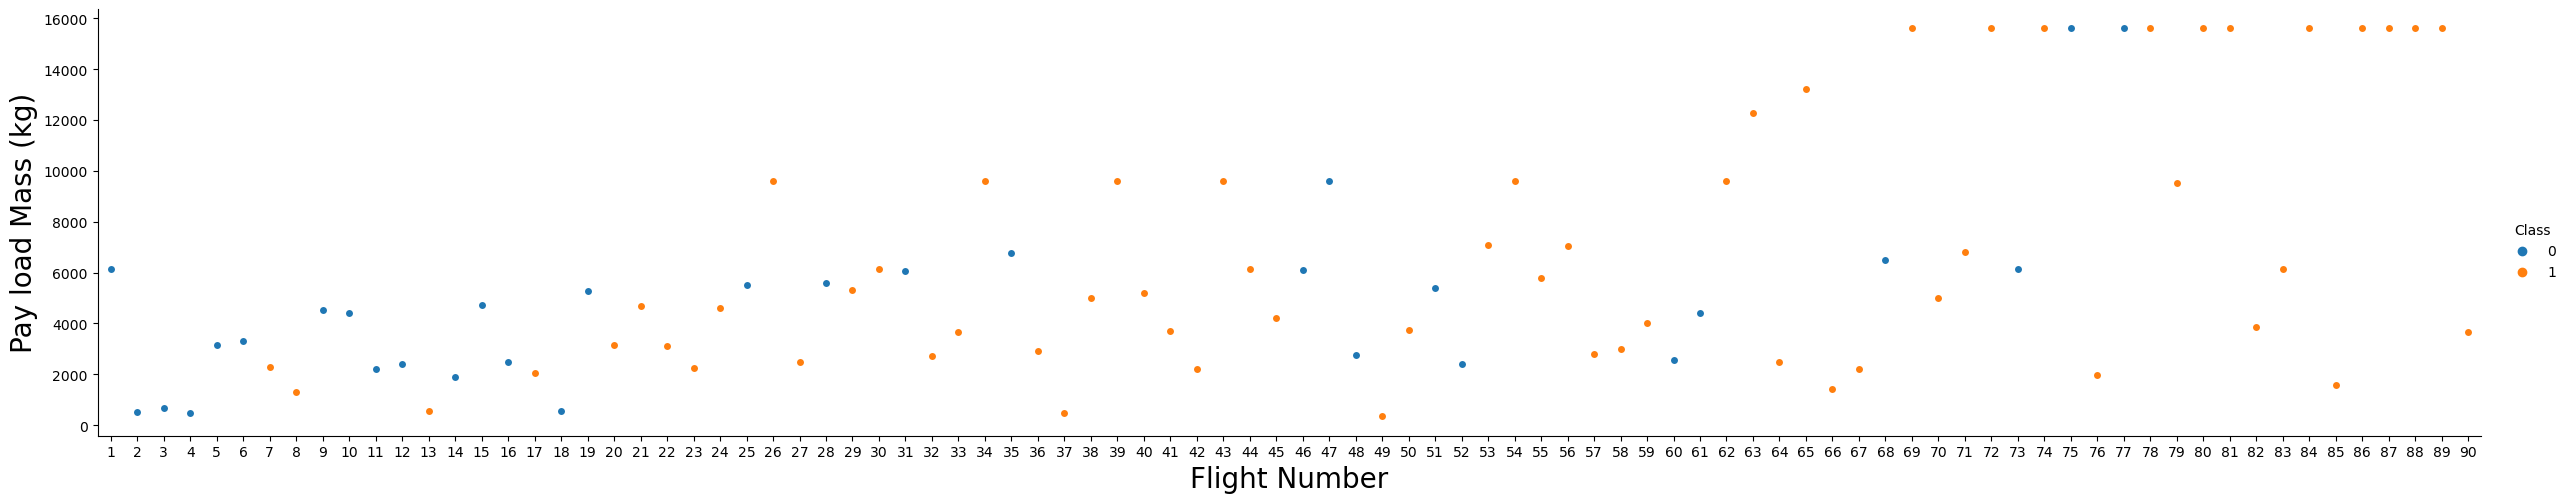

In [35]:
#plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=data_falcon9, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#We can see number of failure is reducing going forward

In [36]:
#Lauch success Rate based on Launch site
df=data_falcon9[['LaunchSite','Class']].groupby('LaunchSite').mean().reset_index()
df

,LaunchSite,Class
0,CCSFS SLC 40,0.600000
1,KSC LC 39A,0.772727
2,VAFB SLC 4E,0.769231


 KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

**Visualizing the usgae of Launch Site over time(Flight Number)**

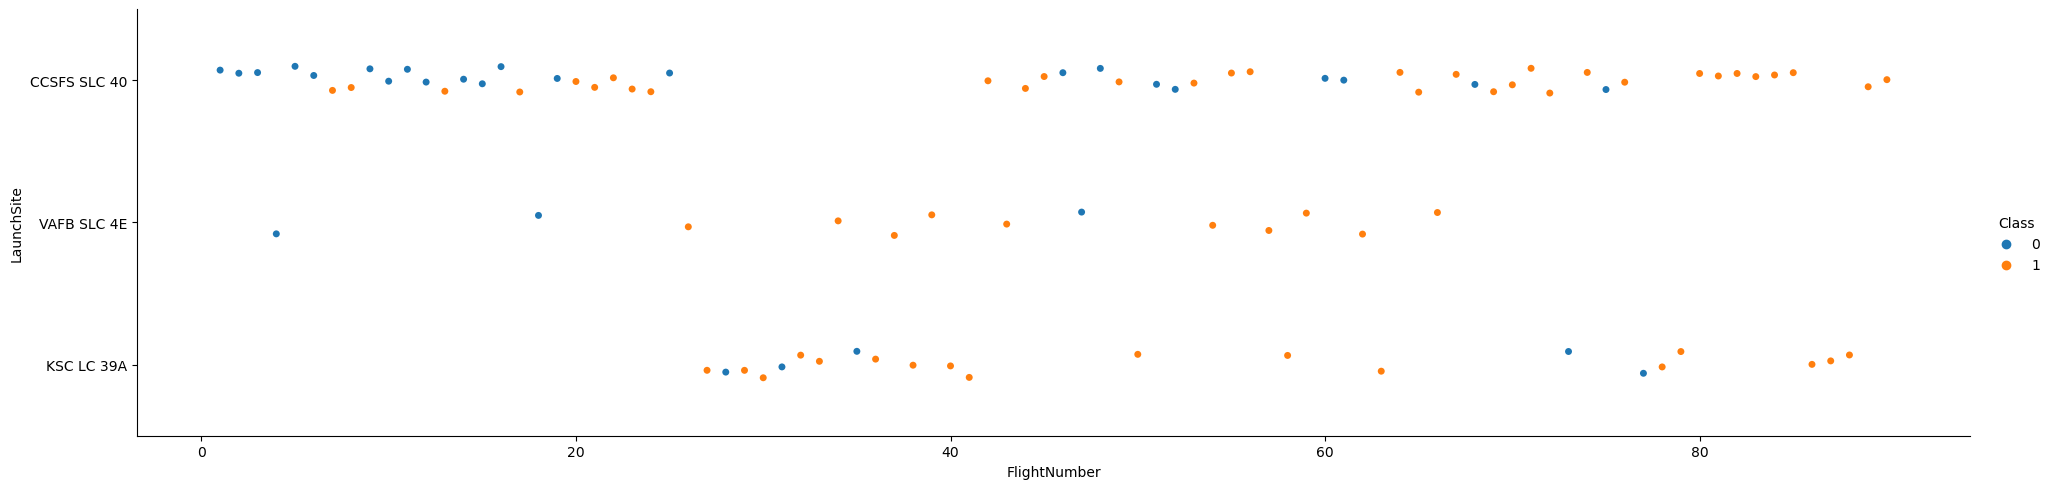

In [37]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class",data=data_falcon9,aspect=4)
plt.ylabel("LaunchSite")
plt.xlabel("FlightNumber")
plt.show()

More number of lauches initial lauch was held at CCSFS SLC 40, thus it reduced the success Rate
Thius indicate , *the issue may not be with the Launch site*

**Relationship between Payload and Launch Site**

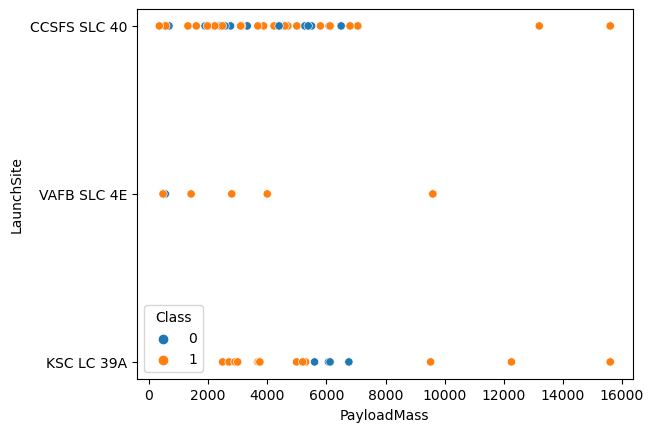

In [38]:
sns.scatterplot(y="LaunchSite",x="PayloadMass",hue="Class",data=data_falcon9)

plt.xlabel("PayloadMass")
plt.ylabel("LaunchSite")
plt.show()

 In VAFB-SLC launchsite, there are no rockets launched for heavypayload mass(greater than 10000)

**Success rate of each orbit type**

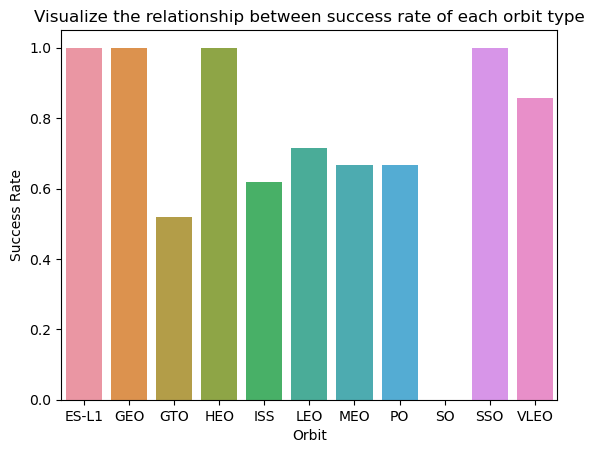

In [39]:
df=data_falcon9[['Orbit','Class']].groupby('Orbit').mean().reset_index()
df
sns.barplot(data=df,x='Orbit',y='Class')

plt.title('Visualize the relationship between success rate of each orbit type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.show()


ES,GEO,HEO and SSO has most success rate

**FlightNumber and Orbit type**

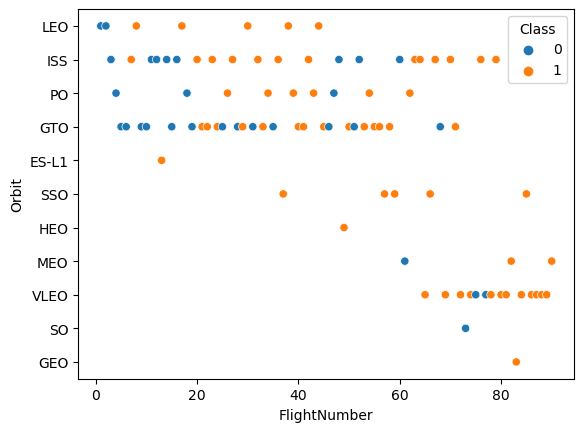

In [40]:
sns.scatterplot(y="Orbit",x="FlightNumber",hue="Class",data=data_falcon9)

plt.show()

The Success of LEO orbit appears related to the number of flights

**Payload and Orbit type**

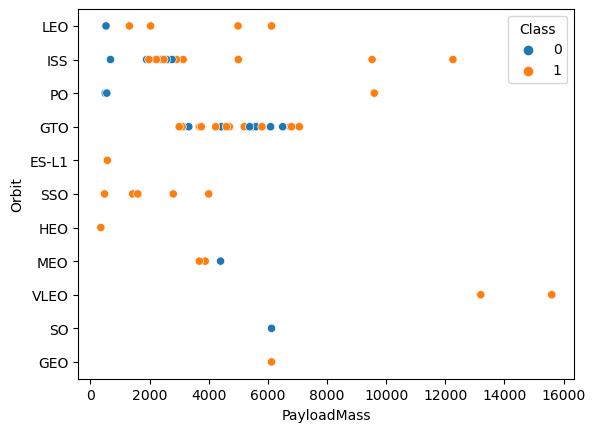

In [41]:
sns.scatterplot(y="Orbit",x="PayloadMass",hue="Class",data=data_falcon9)

plt.show()

Higher payload(8000+) was sent to VLEO ,LEo and PO orbits

### Launch success yearly trend

In [42]:
year=[]
def Extract_year(date):
    for i in date:
        year.append(i.split("-")[0])
    return year

In [44]:
df2=data_falcon9[['Date','Class']]
Extract_year(df2['Date'])
df2['year']=year

C:\Users\rshan\AppData\Local\Temp\ipykernel_56268\3057793141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']=year


In [45]:
df2_mean=df2[['year','Class']].groupby('year').mean()
df2_mean
df2_mean.rename(columns = {'Class':'SuccessRate'}, inplace = True)

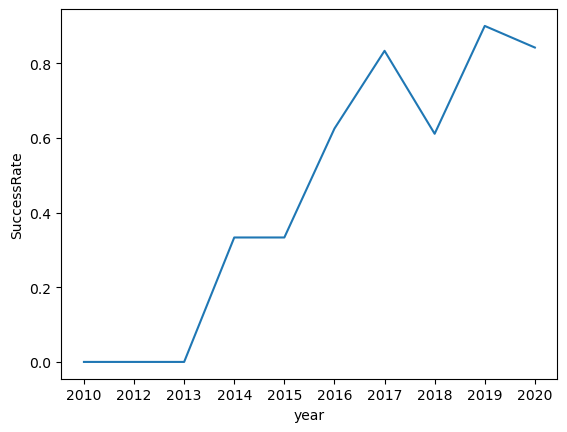

In [46]:
sns.lineplot(x='year',y='SuccessRate',data=df2_mean)
plt.show()

Success rate is increasing over the course of time, but the is dip in 2018


**Store the relavent feature in a DataFrame**

In [47]:
features = data_falcon9[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [48]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins           bool
Reused             bool
Legs               bool
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

**Create dummy variables to categorical columns**

In [49]:
features_one_hot=pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad','Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
features_one_hot=features_one_hot.astype("float64", copy=True)

In [50]:
data_falcon9.to_csv("spacex_clean")

In [53]:
features_one_hot.to_csv("spacex_ml")